# STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS

#### importing machine learning libraries

In [ ]:
#!pip install twython 

In [ ]:
#!pip install tweepy

In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

#### importing library to fetch data from twitter

In [ ]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

#### setting up consumer key and access token

In [ ]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#### Fetching tweets for United Airlines in extended mode (means entire tweet will come and not just few words + link)

In [ ]:
fetch_tweets=tweepy.Cursor(api.search, q="#HindustanUnilever",count=100, lang ="en",since="2020-01-01", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [ ]:
data

,Date,Tweets
0,2022-05-09,RT @ETRetail: Ecommerce sales gallop despite b...
1,2022-05-09,Five very good #fundamental stocks which #trad...
2,2022-05-09,Ecommerce sales gallop despite big rebound in ...
3,2022-05-09,"""Rate hike was inevitable. Inflation is defini..."
4,2022-05-08,RT @ETRetail: HUL expects more sequential infl...
...,...,...
66,2022-04-29,RT @DalalETips: 1st Target is achieved. #Hindu...
67,2022-04-29,1st Target is achieved. #HindustanUnilever hit...
68,2022-04-29,RT @FinancialXpress: #HUL’s gross margins decl...
69,2022-04-29,#HUL’s gross margins declined a sharp 300 basi...


#### Removing special character from each tweets

In [ ]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    # index=index+1
#print(cdata.dtypes)

#### Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [ ]:
cdata

,Date,Tweets
0,2022-05-09,RT ETRetail Ecommerce sales gallop despite big...
1,2022-05-09,Five very good fundamental stocks which tradin...
2,2022-05-09,Ecommerce sales gallop despite big rebound in ...
3,2022-05-09,Rate hike was inevitable Inflation is definite...
4,2022-05-08,RT ETRetail HUL expects more sequential inflat...
...,...,...
66,2022-04-29,RT DalalETips 1st Target is achieved Hindustan...
67,2022-04-29,1st Target is achieved HindustanUnilever hits ...
68,2022-04-29,RT FinancialXpress HULs gross margins declined...
69,2022-04-29,HULs gross margins declined a sharp 300 basis ...


#### Creating a dataframe where we will combine the tweets date wise and store into

In [ ]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [ ]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

#### All the tweets has been clubbed as per their date.

In [ ]:
ccdata

,Date,Tweets
0,2022-05-09,RT ETRetail Ecommerce sales gallop despite big...
1,2022-05-08,RT ETRetail HUL expects more sequential infla...
2,2022-05-07,Consumers are no longer interested in buying ...
3,2022-05-04,RT ArvindChaturved HindustanUnilevers HULchi...
4,2022-05-03,Adani Wilmar Ltd a packaged goods company tod...
5,2022-05-02,RT businesstoday Packaged foods major AdaniWi...
6,2022-05-01,
7,2022-04-30,Palm oil Distributors resort to panic buying ...


#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for UNITED AIRLINES from "yahoo.finance". We will consider "Close" price only.

In [ ]:
read_stock_p=pd.read_csv('/content/HINDUNILVR.NS.csv')
# DOWNLOAD UPDATED CLOSE PRICE FROM https://finance.yahoo.com/quote/UAL/history?period1=1598918400&period2=1632268800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-10,2423.000000,2446.949951,2416.000000,2432.899902,2400.669678,988495
1,2021-05-11,2425.000000,2426.000000,2394.250000,2402.100098,2370.278076,1019077
2,2021-05-12,2389.000000,2389.000000,2325.050049,2328.949951,2298.096924,2053932
3,2021-05-14,2328.899902,2382.399902,2326.000000,2376.850098,2345.362549,1388970
4,2021-05-17,2385.000000,2395.000000,2366.500000,2376.250000,2344.770264,811243
...,...,...,...,...,...,...,...
243,2022-05-02,2220.000000,2252.000000,2205.899902,2230.500000,2230.500000,1543544
244,2022-05-04,2241.949951,2250.850098,2148.649902,2171.550049,2171.550049,1608395
245,2022-05-05,2178.000000,2201.949951,2153.600098,2166.600098,2166.600098,1101451
246,2022-05-06,2125.000000,2170.000000,2106.199951,2149.199951,2149.199951,1585602


#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [ ]:
ccdata['Prices']=""

In [ ]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])

#### Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [ ]:
ccdata

,Date,Tweets,Prices
0,2022-05-09,RT ETRetail Ecommerce sales gallop despite big...,2116
1,2022-05-08,RT ETRetail HUL expects more sequential infla...,
2,2022-05-07,Consumers are no longer interested in buying ...,
3,2022-05-04,RT ArvindChaturved HindustanUnilevers HULchi...,2171
4,2022-05-03,Adani Wilmar Ltd a packaged goods company tod...,
5,2022-05-02,RT businesstoday Packaged foods major AdaniWi...,2230
6,2022-05-01,,
7,2022-04-30,Palm oil Distributors resort to panic buying ...,


#### So we take the mean for the close price and put it in the blank value

In [ ]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

#### Now all the entries have some value

In [ ]:
ccdata

,Date,Tweets,Prices
0,2022-05-09,RT ETRetail Ecommerce sales gallop despite big...,2116
1,2022-05-08,RT ETRetail HUL expects more sequential infla...,2172
2,2022-05-07,Consumers are no longer interested in buying ...,2172
3,2022-05-04,RT ArvindChaturved HindustanUnilevers HULchi...,2171
4,2022-05-03,Adani Wilmar Ltd a packaged goods company tod...,2172
5,2022-05-02,RT businesstoday Packaged foods major AdaniWi...,2230
6,2022-05-01,,2172
7,2022-04-30,Palm oil Distributors resort to panic buying ...,2172


#### Making "prices" column as integer so mathematical operations could be performed easily.

In [ ]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [ ]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-05-09,RT ETRetail Ecommerce sales gallop despite big...,2116,,,,
1,2022-05-08,RT ETRetail HUL expects more sequential infla...,2172,,,,
2,2022-05-07,Consumers are no longer interested in buying ...,2172,,,,
3,2022-05-04,RT ArvindChaturved HindustanUnilevers HULchi...,2171,,,,
4,2022-05-03,Adani Wilmar Ltd a packaged goods company tod...,2172,,,,
5,2022-05-02,RT businesstoday Packaged foods major AdaniWi...,2230,,,,
6,2022-05-01,,2172,,,,
7,2022-04-30,Palm oil Distributors resort to panic buying ...,2172,,,,


#### Downloading this package was essential to perform sentiment analysis.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
ccdata.head()

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-05-09,RT ETRetail Ecommerce sales gallop despite big...,2116,0.5083,0.077,0.827,0.5083
1,2022-05-08,RT ETRetail HUL expects more sequential infla...,2172,0.2177,0.0,0.896,0.2177
2,2022-05-07,Consumers are no longer interested in buying ...,2172,-0.25,0.101,0.804,-0.25
3,2022-05-04,RT ArvindChaturved HindustanUnilevers HULchi...,2171,0.0516,0.022,0.959,0.0516
4,2022-05-03,Adani Wilmar Ltd a packaged goods company tod...,2172,-0.2441,0.053,0.909,-0.2441


In [ ]:
ccdata.tail()

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
3,2022-05-04,RT ArvindChaturved HindustanUnilevers HULchi...,2171,0.0516,0.022,0.959,0.0516
4,2022-05-03,Adani Wilmar Ltd a packaged goods company tod...,2172,-0.2441,0.053,0.909,-0.2441
5,2022-05-02,RT businesstoday Packaged foods major AdaniWi...,2230,0.9413,0.034,0.899,0.9413
6,2022-05-01,,2172,0.0,0.0,0.0,0.0
7,2022-04-30,Palm oil Distributors resort to panic buying ...,2172,-0.743,0.193,0.764,-0.743


In [ ]:
ccdata.value_counts

<bound method DataFrame.value_counts of          Date                                             Tweets  Prices  \
0  2022-05-09  RT ETRetail Ecommerce sales gallop despite big...    2116   
1  2022-05-08   RT ETRetail HUL expects more sequential infla...    2172   
2  2022-05-07   Consumers are no longer interested in buying ...    2172   
3  2022-05-04   RT ArvindChaturved HindustanUnilevers  HULchi...    2171   
4  2022-05-03   Adani Wilmar Ltd a packaged goods company tod...    2172   
5  2022-05-02   RT businesstoday Packaged foods major AdaniWi...    2230   
6  2022-05-01                                                       2172   
7  2022-04-30   Palm oil Distributors resort to panic buying ...    2172   

     Comp Negative Neutral Positive  
0  0.5083    0.077   0.827   0.5083  
1  0.2177      0.0   0.896   0.2177  
2   -0.25    0.101   0.804    -0.25  
3  0.0516    0.022   0.959   0.0516  
4 -0.2441    0.053   0.909  -0.2441  
5  0.9413    0.034   0.899   0.9413  
6     0.0

#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets=  50.0
% of negative tweets=  37.5


[]

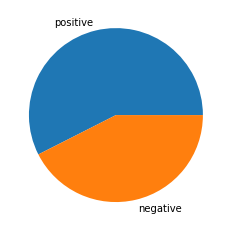

In [ ]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.

In [ ]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [ ]:
df_.head()

,Date,Prices,Comp,Negative,Neutral,Positive
0,2022-05-09,2116,0.5083,0.077,0.827,0.5083
1,2022-05-08,2172,0.2177,0.0,0.896,0.2177
2,2022-05-07,2172,-0.25,0.101,0.804,-0.25
3,2022-05-04,2171,0.0516,0.022,0.959,0.0516
4,2022-05-03,2172,-0.2441,0.053,0.909,-0.2441


#### Dividing the dataset into train and test.

In [ ]:
train_start_index = '0'
train_end_index = '4'
test_start_index = '5'
test_end_index = '7'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [ ]:
print(numpy_df_train)

[[ 0.077   0.5083]
 [ 0.      0.2177]
 [ 0.101  -0.25  ]
 [ 0.022   0.0516]
 [ 0.053  -0.2441]]


#### Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [ ]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [ ]:
print(numpy_df_test)

[[ 0.034   0.9413]
 [ 0.      0.    ]
 [ 0.193  -0.743 ]]


#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [ ]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0    2116
1    2172
2    2172
3    2171
4    2172


#### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [ ]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor()

#### Making Predictions

In [ ]:
prediction = rf.predict(numpy_df_test)

In [ ]:
print(prediction)

[2138.2  2171.58 2165.24]


#### Importing matplotlib library for plotting graph

In [ ]:
import matplotlib.pyplot as plt

#### Defining index position for the test data. Making dataframe for the predicted value.

In [ ]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [ ]:
predictions_df_

,Prices
5,2138.20
6,2171.58
7,2165.24


In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(y_test,prediction,squared=False)
print(rmse)

53.144814736090154


#### Plotting the graph for the Predicted_price VS Actual Price

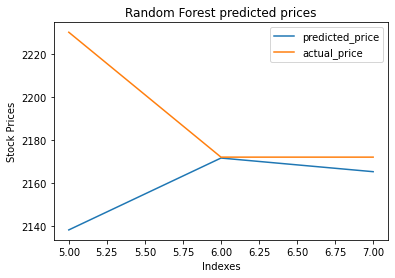

In [ ]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [ ]:
# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [ ]:
reg.predict(numpy_df_test)

array([[2103.27243949],
       [2182.41585379],
       [2167.6925613 ]])